# Correlation Example

## Dependencies

In [1]:
import numpy
import seaborn
import matplotlib.pyplot as plt

from skimage import io

## 1D Correlation

### Function g(t)

In [2]:
N = 20
g = numpy.linspace(0, 1, num = N)

### Function h(t)

In [3]:
M = 200
h = numpy.zeros(M)
h[30:34] = 1
h[40:44] = 1
h[80:100] = numpy.linspace(0, 1, num = 20)
h[139:190] = numpy.cos(numpy.linspace(0, 5*numpy.pi, num = 51))

### Plot functions

/usr/local/lib/python3.5/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


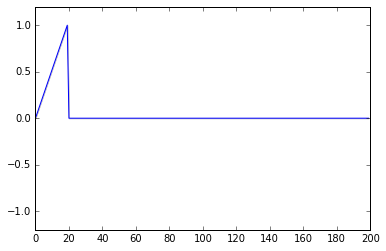

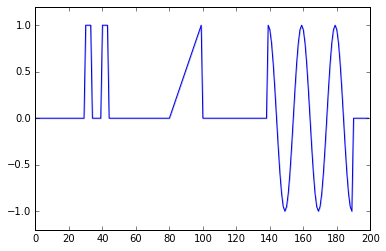

In [4]:
fig = plt.figure()
g_plot = seaborn.tsplot(numpy.concatenate((g, numpy.zeros(M-N))))
g_plot.set(ylim=(-1.2, 1.2), xticks=numpy.arange(0,201,20))
plt.show()
plt.clf()

fig = plt.figure()
h_plot = seaborn.tsplot(h)
h_plot.set(ylim=(-1.2, 1.2), xticks=numpy.arange(0,201,20))
plt.show()

### Correlation

/usr/local/lib/python3.5/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


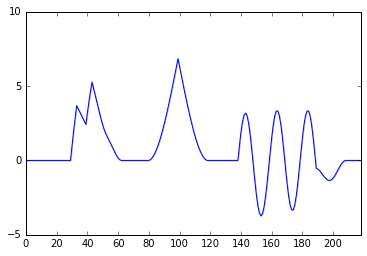

In [5]:
f = numpy.zeros(M+N-1)
h_padded = numpy.concatenate((numpy.zeros(N-1), h, numpy.zeros(N-1)), axis=0) 
for k in range(M+N-1):
    f[k] = sum([g[i]*h_padded[k+i] for i in range(N)])
    
fig = plt.figure()
f_plot = seaborn.tsplot(f)
f_plot.set(ylim=(-5, 10), xticks=numpy.arange(0,201,20), yticks = numpy.array([-5, 0, 5, 10]))
plt.show()

## 2D Correlation

### Generate object templates

In [6]:
tam = 25
square = numpy.zeros((tam, tam))
circle = numpy.zeros((tam, tam))
triang = numpy.zeros((tam, tam))
for i in range(tam):
    for j in range(tam):
        if i > 0.1*tam and i < 0.9*tam and j > 0.1*tam and j < 0.9*tam:
            square[i, j] = 1
            if i > j:
                triang[i, j] = 1
        if (((i-tam/2)**2 + (j-tam/2)**2)) < (0.4*tam)**2:
            circle[i,j] = 1

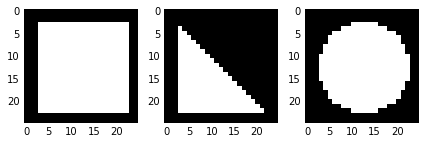

In [7]:
plt.subplot(131)
io.imshow(square)
plt.subplot(132)
io.imshow(triang)
plt.subplot(133)
io.imshow(circle)
plt.show()

### Generate image

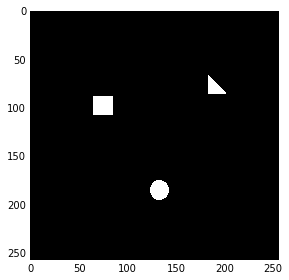

In [8]:
img = numpy.zeros((256, 256))

obj1 = (85, 62)
obj2 = (172, 120)
obj3 = (63, 180)

img[obj1[0]:(obj1[0]+tam), obj1[1]:(obj1[1]+tam)] = square
img[obj2[0]:(obj2[0]+tam), obj2[1]:(obj2[1]+tam)] = circle
img[obj3[0]:(obj3[0]+tam), obj3[1]:(obj3[1]+tam)] = triang

io.imshow(img)
plt.show()

### Apply correlation filter

In [9]:
def correlation2d(template, image):
    padded_norm_img = numpy.zeros((image.shape[0]+2*template.shape[0]-1,
                                   image.shape[1]+2*template.shape[1]-1))
    padded_norm_img[template.shape[0]:(image.shape[0]+template.shape[0]),
                    template.shape[1]:(image.shape[1]+template.shape[1])] = numpy.subtract(image, numpy.mean(image))
    template_norm = numpy.subtract(template, numpy.mean(template))
    width = image.shape[0]+template.shape[0]-1
    height = image.shape[1]+template.shape[1]-1
    corr = numpy.zeros((width, height))
    for alpha in range(width):
        for beta in range(height):
            corr[alpha, beta] = numpy.sum(numpy.multiply(template_norm, padded_norm_img[alpha:(alpha+template.shape[0]),beta:(beta+template.shape[1])]))
    return(corr)

In [10]:
square_cor = correlation2d(square, img)
circle_cor = correlation2d(circle, img)
triang_cor = correlation2d(triang, img)

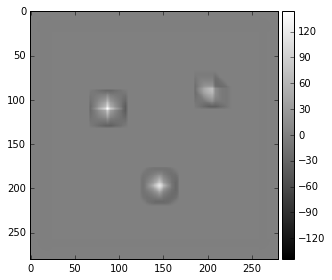

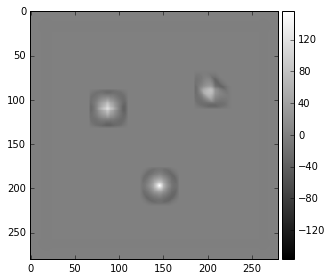

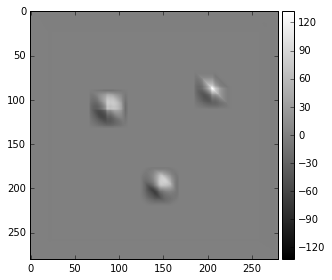

In [11]:
io.imshow(square_cor, cmap = 'gray')
plt.show()
io.imshow(circle_cor, cmap = 'gray')
plt.show()
io.imshow(triang_cor, cmap = 'gray')
plt.show()

### Get the max correlations

In [12]:
numpy.subtract(numpy.unravel_index(square_cor.argmax(), square_cor.shape), tam)

array([85, 62])

In [13]:
numpy.subtract(numpy.unravel_index(circle_cor.argmax(), square_cor.shape), tam)

array([172, 120])

In [14]:
numpy.subtract(numpy.unravel_index(triang_cor.argmax(), square_cor.shape), tam)

array([ 63, 180])